In [1]:
import numpy as np
from astropy.io import fits
from matplotlib import pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
import os
import pandas as pd
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [2]:
home = os.path.expanduser('~')
workdir = home + "/XBinary-Classifier"

In [3]:
# read the file
filepath = workdir + '/alldata.fits'
with fits.open(filepath) as data:
    df = pd.DataFrame(data[1].data)
    print(df.columns)

Index(['NAME', 'RA', 'DEC', 'VMAG', 'BV_COLOR', 'PORB', 'FLUX', 'FLUX_MAX',
       'LII', 'BII', 'VMAG_MIN', 'UB_COLOR', 'PULSE_PERIOD', 'target'],
      dtype='object')


In [4]:
df

,NAME,RA,DEC,VMAG,BV_COLOR,PORB,FLUX,FLUX_MAX,LII,BII,VMAG_MIN,UB_COLOR,PULSE_PERIOD,target
0,SAX J1603.9-7753,240.97500,-77.88500,0.00,0.00,0.0000,160.0,0.0,312.42847,-18.73093,0.0,0.0,0.00,0
1,2A 0521-720,80.11683,-71.96481,18.00,0.00,0.3400,9.0,44.0,283.09949,-32.69058,19.0,-0.8,0.00,0
2,RX J0532.7-6926,83.17833,-69.43833,0.00,0.00,0.0000,0.5,0.0,279.93933,-32.15468,0.0,0.0,0.00,0
3,4U 1254-69,194.40500,-69.28911,19.10,0.30,0.1638,25.0,0.0,303.48189,-6.42396,0.0,0.0,0.00,0
4,GS 1124-684,171.61125,-68.67572,13.30,0.30,0.4325,3000.0,0.0,295.30054,-7.07259,0.0,0.0,0.00,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,IGR J00370+6122,9.29167,61.35972,9.65,0.56,15.6650,8.0,0.0,121.22213,-1.46464,0.0,0.0,0.00,1
297,4U 0115+634,19.63292,63.74000,14.50,1.40,24.3000,2.0,350.0,125.92366,1.02574,16.3,0.3,3.61,1
298,2S 0114+650,19.51125,65.29167,11.00,1.20,11.6000,4.0,0.0,125.70998,2.56353,0.0,0.1,10008.00,1
299,IGR J01363+6610,23.95833,66.21111,13.29,1.39,0.0000,9.0,0.0,127.39482,3.72480,0.0,0.0,0.00,1


In [5]:
df['target'] = df['target'].astype(np.int8)
#df['FLUX_MAX'] = df['FLUX_MAX'].astype(np.float64)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   NAME          301 non-null    object
 1   RA            301 non-null    >f8   
 2   DEC           301 non-null    >f8   
 3   VMAG          301 non-null    >f8   
 4   BV_COLOR      301 non-null    >f8   
 5   PORB          301 non-null    >f8   
 6   FLUX          301 non-null    >f8   
 7   FLUX_MAX      301 non-null    >f8   
 8   LII           301 non-null    >f8   
 9   BII           301 non-null    >f8   
 10  VMAG_MIN      301 non-null    >f8   
 11  UB_COLOR      301 non-null    >f8   
 12  PULSE_PERIOD  301 non-null    >f8   
 13  target        301 non-null    int8  
dtypes: float64(12), int8(1), object(1)
memory usage: 31.0+ KB


In [6]:
for column in df.columns:
    if df[column].dtype.byteorder == '>':  # Big-endian
        df[column] = df[column].values.byteswap().newbyteorder()

In [7]:
target_column = 'target'
y = df['target']
feature_columns = ['RA', 'DEC', 'VMAG', 'BV_COLOR', 'PORB', 'FLUX', 'FLUX_MAX', 'LII', 'BII', 'VMAG_MIN', 'UB_COLOR', 'PULSE_PERIOD']
X = df[feature_columns]

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,random_state=0)

knn = KNeighborsClassifier(n_neighbors = 4) #choose classifier
KNN_fit = knn.fit(X_train, y_train)#train classifier
accuracy = KNN_fit.score(X_test, y_test) #Estimate the accuracy of the classifier on future data
print ('KNN score: {}\n'.format(accuracy))
cv_scores = cross_val_score(knn, X, y)
print('Cross-validation scores (3-fold):', cv_scores)
print('Mean cross-validation score (3-fold): {:.3f}'.format(np.mean(cv_scores)))

KNN score: 0.7236842105263158

Cross-validation scores (3-fold): [0.72131148 0.75       0.73333333 0.76666667 0.6       ]
Mean cross-validation score (3-fold): 0.714


In [9]:
preds = KNN_fit.predict(X_test)

In [10]:
y_test.shape, preds.shape

((76,), (76,))

In [11]:
cm = confusion_matrix(y_test, preds)
cm

array([[41, 11],
       [10, 14]])

In [12]:
cm.shape

(2, 2)

<AxesSubplot:>

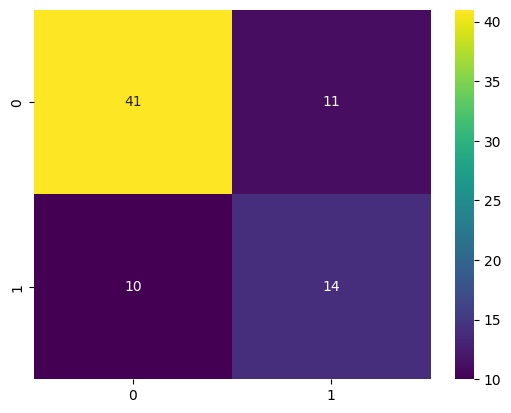

In [13]:
import seaborn as sns
sns.heatmap(cm, annot=True, cmap='viridis')